In [ ]:
!pip install pandas

                                              0.0/10.6 MB ? eta -:--:--
                                              0.2/10.6 MB 6.9 MB/s eta 0:00:02
     -                                        0.4/10.6 MB 4.6 MB/s eta 0:00:03
     --                                       0.7/10.6 MB 5.5 MB/s eta 0:00:02
     --                                       0.8/10.6 MB 4.5 MB/s eta 0:00:03
     ----                                     1.2/10.6 MB 5.2 MB/s eta 0:00:02
     ------                                   1.7/10.6 MB 6.2 MB/s eta 0:00:02
     --------                                 2.3/10.6 MB 6.8 MB/s eta 0:00:02
     ----------                               2.7/10.6 MB 7.2 MB/s eta 0:00:02
     -----------                              3.2/10.6 MB 7.8 MB/s eta 0:00:01
     -------------                            3.6/10.6 MB 7.7 MB/s eta 0:00:01
     ---------------                          4.2/10.6 MB 8.5 MB/s eta 0:00:01
     -----------------                        4.8/10.6 MB 8


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from scipy.stats import pearsonr, kendalltau
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("Iris.csv")
dataset.drop(inplace=True, columns=['YearCollected', 'MonthCollected', 'Id'])
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,StigmaLegnth,Species
0,5.1,3.5,1.4,0.2,Purple,2,Iris-setosa
1,4.9,3.0,1.4,0.2,Orange,1,Iris-setosa
2,4.7,3.2,1.3,0.2,Black,3,Iris-setosa
3,4.6,3.1,1.5,0.2,White,3,Iris-setosa
4,5.0,3.6,1.4,0.2,Teal,1,Iris-setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Purple,3,Iris-virginica
146,6.3,2.5,5.0,1.9,Lime,4,Iris-virginica
147,6.5,3.0,5.2,2.0,Silver,2,Iris-virginica
148,6.2,3.4,5.4,2.3,Lime,4,Iris-virginica


### Preprocessing

In [4]:
X = dataset.drop('Species', axis=1)
y = dataset['Species']

encoder = LabelEncoder()
X['FlowerColour'] = encoder.fit_transform(X['FlowerColour'])
y_trans = encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=42)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,StigmaLegnth
22,4.6,3.6,1.0,0.2,14,2
15,5.7,4.4,1.5,0.4,12,1
65,6.7,3.1,4.4,1.4,1,17
11,4.8,3.4,1.6,0.2,16,4
42,4.4,3.2,1.3,0.2,8,1
...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,6,14
106,4.9,2.5,4.5,1.7,0,2
14,5.8,4.0,1.2,0.2,18,1
92,5.8,2.6,4.0,1.2,12,19


In [6]:

y_train_dataset = pd.DataFrame(y_train, columns=['Target'])

def pearson_corr(X, y):
    return X_train.corrwith(y_train_dataset['Target']).abs()

k = 3
selector = SelectKBest(score_func=pearson_corr, k=k)
selected_features_r = selector.fit(X_train, y_train).get_support(indices=True)

print("Features selected by Pearson's r:", X_train.columns[selected_features_r])

Features selected by Pearson's r: Index(['PetalLengthCm', 'PetalWidthCm', 'FlowerColour'], dtype='object')


In [ ]:
tau_scores = []
for feature in X_train.columns:
    tau, _ = kendalltau(X_train[feature], y_train)
    tau_scores.append(abs(tau))

k = 3
selector = SelectKBest(score_func=lambda X, y: (tau_scores, [0] * len(tau_scores)), k=k)
selected_features_tau = selector.fit(X_train, y_train).get_support(indices=True)

print("Features selected by Kendall's tau:", X_train.columns[selected_features_tau])

Features selected by Kendall's tau: Index(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [ ]:
mi_scores = mutual_info_regression(X_train, y_train)

k = 3
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selected_features_mi = selector.fit(X_train, y_train).get_support(indices=True)

print("Features selected by Mutual Information:", X_train.columns[selected_features_mi])

Features selected by Mutual Information: Index(['PetalLengthCm', 'PetalWidthCm', 'StigmaLegnth'], dtype='object')


In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

coefs = model.coef_[0]
selected_features_lr = X_train.columns[coefs != 0]

print("Features selected by Logistic Regression L1:", selected_features_lr)

Features selected by Logistic Regression L1: Index(['SepalWidthCm', 'PetalLengthCm', 'FlowerColour', 'StigmaLegnth'], dtype='object')


### Results

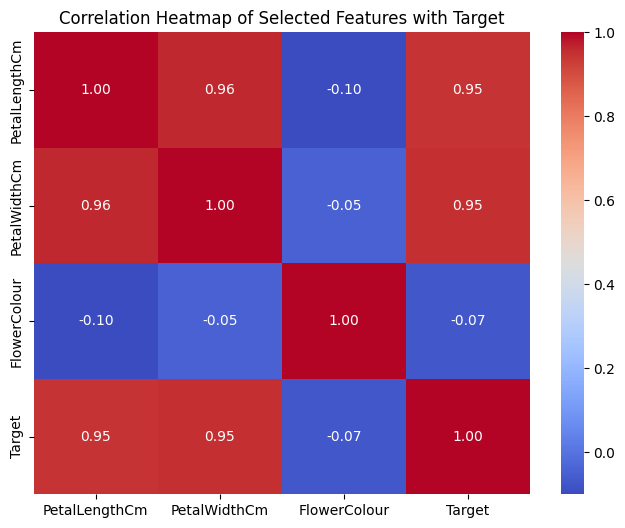

In [ ]:
r = X_train[X_train.columns[selected_features_r]].copy()
r['Target'] = y_train
correlation_matrix = r.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

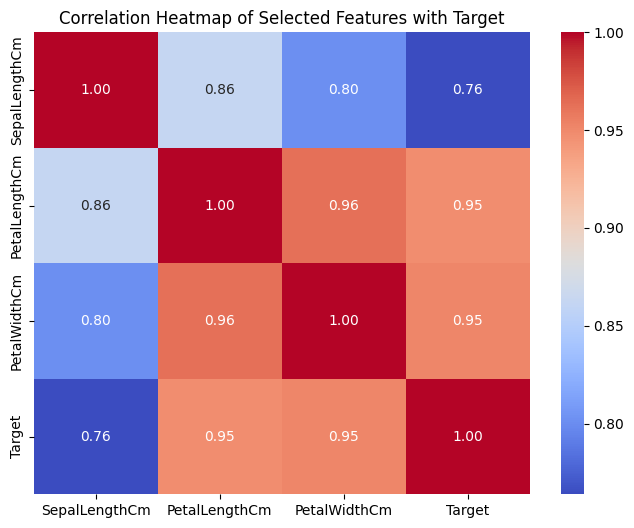

In [ ]:
tau = X_train[X_train.columns[selected_features_tau]].copy()
tau['Target'] = y_train
correlation_matrix = tau.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

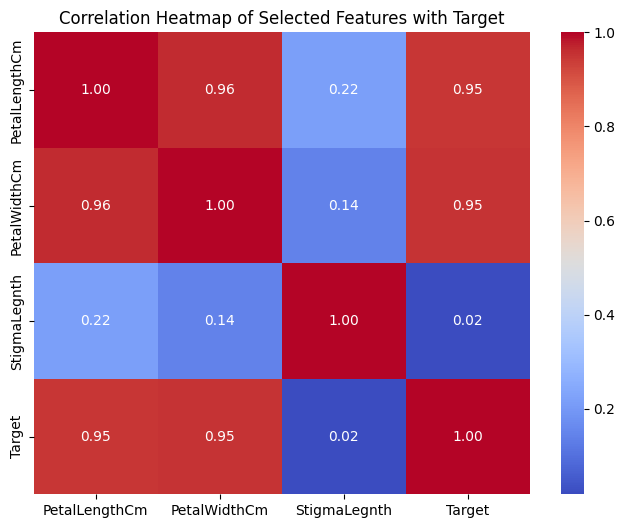

In [ ]:
mi = X_train[X_train.columns[selected_features_mi]].copy()
mi['Target'] = y_train
correlation_matrix = mi.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

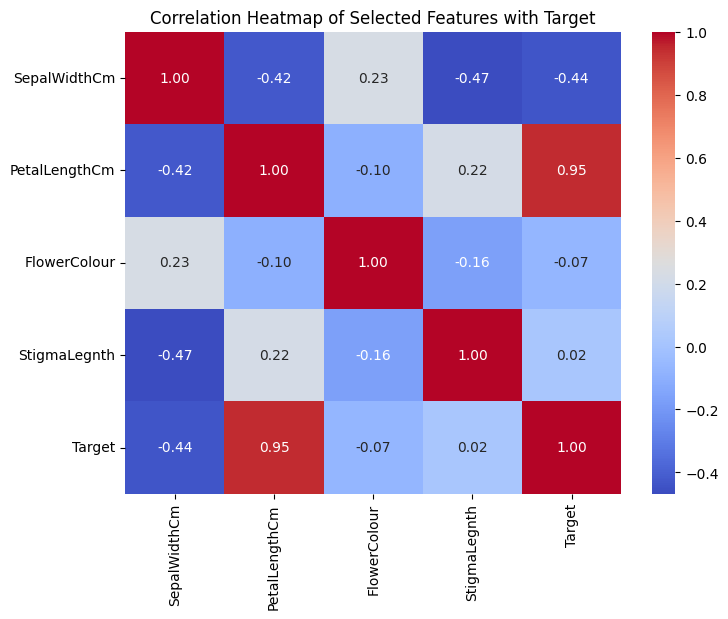

In [ ]:
lr = X_train[selected_features_lr].copy()
lr['Target'] = y_train
correlation_matrix = lr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

 1. What features did you manually dropped before applying the feature selection methods? Explain why.
    YearCollected, Id, and MonthCollected because they are irrelevant.

 2. Are there any common features selected across multiple methods?
    PetalLengthCm